# 1. Business Understanding

## High-Level Overview

Customer churn is one of the most pressing challenges for subscription-based businesses. In the telecommunications sector, churn directly impacts revenue, customer lifetime value, and operational efficiency. The aim of this project is to predict which customers are most likely to stop using the service (i.e., churn) using a machine learning model. This will allow the business to proactively retain high-risk customers through personalized interventions.


## Problem Statement

Telecom companies experience high customer turnover due to increased competition, service dissatisfaction, or pricing issues. Each customer lost means:
- Loss of recurring revenue
- Increased cost of acquiring new customers
- Possible damage to brand reputation if the churn results from a poor customer experience

The ability to predict churn enables timely, targeted action — such as retention offers or personalized outreach — to prevent customer loss.


## Stakeholders

- **Customer Retention Team**: Interested in identifying high-risk customers to launch retention campaigns.
- **Marketing Department**: Wants to segment and personalize campaigns for better ROI.
- **Executive Leadership**: Focused on minimizing churn rate to maintain market share and improve profitability.


## Project Objective

Develop a supervised machine learning model that:
- Accurately predicts whether a customer is likely to churn
- Identifies the key drivers of churn
- Can be integrated into existing customer management workflows for real-time insights


## Business Value

This model will empower the business to:
- Reduce customer churn and stabilize revenue
- Optimize resource allocation (target only high-risk customers)
- Design more effective and data-driven customer retention strategies
- Increase customer lifetime value (CLV)


## Why Machine Learning?

Machine learning is well-suited for solving the churn prediction problem because:
- It automates the detection of complex, non-linear patterns in large customer datasets
- It handles high-dimensional data better than manual analysis
- It can continuously learn and improve over time as new data comes in
- Churn is inherently a **binary classification** task — customers either churn (1) or do not (0) — making it ideal for classification algorithms

Using ML will enable predictive decision-making that goes beyond descriptive analytics.


# 2. Data Understanding

A critical first step in the data science workflow is to understand the structure, content, and potential quality issues within the dataset. This helps to identify necessary cleaning steps and informs modeling decisions.

We will begin by loading the dataset and performing an initial preview.

---

## 2.1 Load and Preview Data

We will load the dataset into a pandas DataFrame and preview the first few rows to get a sense of the variables available, the structure of the data, and any immediate data quality issues.


In [55]:
# Import libraries

import pandas as pd

# Load the dataset

df = pd.read_csv('../data/bigml_59c28831336c6604c800002a.csv')

# Preview the first 5 rows

df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 2.2 Dataset Shape

We begin by checking the dimensions of the dataset to understand how many records (rows) and attributes (columns) we’re working with.


In [42]:
# Shape of the dataset

print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset contains 3333 rows and 21 columns.


## 2.3 Data Types and Structure

We inspect data types and the number of non-null entries to identify potential null values, understand feature types (numeric vs. categorical), and assess overall data structure.


In [43]:
# Info about data types and non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## 2.4 Missing Values

Missing values can negatively affect model performance. Here, we calculate the total and percentage of missing values in each column.


In [44]:
# Total and percentage of missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})
missing_summary[missing_summary['Missing Values'] > 0]


,Missing Values,Percentage (%)


In [56]:
# List of categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['state', 'phone number', 'international plan', 'voice mail plan']


### 2.5 Encode Categorical Columns

In [57]:
# Encode Categorical Columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


### 2.6 Confirm Final Dataset

In [58]:
# Check shape and structure of cleaned data
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Columns: 3401 entries, account length to voice mail plan_yes
dtypes: bool(1), float64(8), int64(8), uint8(3384)
memory usage: 11.2 MB


## EDA and Statistics
**We want to uncover patterns, trends, and relationships to better understand customer churn. Some guiding questions:**

- 1.Which features are most associated with churn?

- 2.Do customers with international plans churn more?

- 3.Does the number of customer service calls relate to churn?

- 4.How does usage (minutes, charges) differ between churners and non-churners?

- 5.Are there any standout states with higher churn rates?

### Importing Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default theme for seaborn
sns.set(style="whitegrid")

### Churn Distribution

Before analyzing features in relation to churn, let's understand the overall distribution of churned vs non-churned customers. This tells us whether we’re dealing with class imbalance.

Churn Rate: 14.49%


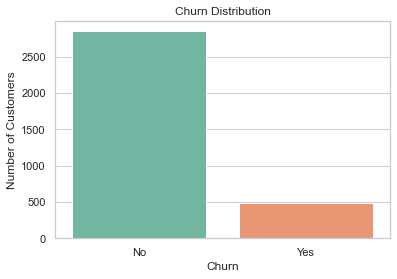

In [60]:
# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ['No', 'Yes'])

# Show churn rate
churn_rate = df['churn'].mean()
print(f"Churn Rate: {churn_rate:.2%}")
plt.show()

### Churn Distribution – Interpretation

The bar chart above visualizes the distribution of customers who have churned (left the service) versus those who have remained subscribed.

#### Key Observations

- *Most customers did not churn*  
  The chart shows that a large majority of the customers fall under the "No" category, meaning they did not leave the company. This is represented by the much taller bar on the left.

- *Only a small portion churned*  
  A significantly smaller number of customers fall under the "Yes" category. These are the customers who have churned and are represented by the shorter bar on the right.

#### Why This Matters

- *Class Imbalance*  
  This imbalance between churned and non-churned customers is critical to highlight. When training machine learning models, class imbalance can lead to a situation where the model favors the majority class ("No churn") and performs poorly at detecting churned customers. This will need to be addressed later in the modeling phase through techniques such as resampling or adjusting class weights.

- *Business Implications*  
  While the proportion of churned customers appears relatively small, each lost customer can represent a financial loss and potential dissatisfaction with the service. Understanding the causes of churn is essential to improving customer satisfaction and long-term retention.

#### Next Steps

In the next steps, I will explore how different variables (such as international plan, customer service calls, and usage behavior) relate to churn. This will help build a foundation for predictive modeling and inform actionable business strategies to reduce churn.

### Churn Rate by International Plan

**Goal:**  
Explore whether customers who have subscribed to the **International Plan** are more likely to churn than those who haven’t.

To analyze this, I will:

- Group the dataset by `international plan` and `churn` status.
- Count the number of customers in each group.
- Normalize the values to show proportions.
- Visualize the results in a stacked bar chart to compare churn behavior for customers **with** and **without** an international plan.

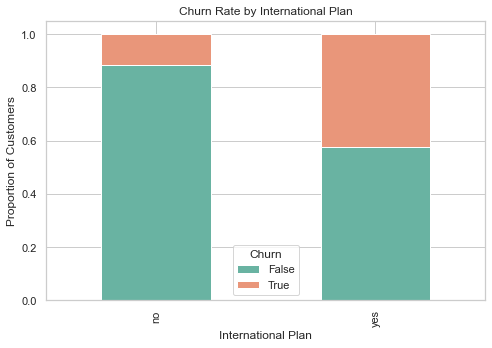

In [61]:
#Churn Rate by International Plan
int_plan_churn = df.groupby(['international plan', 'churn']).size().unstack()

# Normalize by row to get percentages
int_plan_churn_percent = int_plan_churn.div(int_plan_churn.sum(axis=1), axis=0)

# Plot
int_plan_churn_percent.plot(kind='bar', stacked=True, figsize=(7,5), color=['#69b3a2', '#e9967a'])
plt.title("Churn Rate by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Proportion of Customers")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

### Churn Rate by International Plan - Interpretation

This bar chart compares the proportion of customers who churned based on whether they were subscribed to the *International Plan*.

*Key Insights:*

- *Customers without an International Plan (left bar): The vast majority did **not churn*. A very small portion of this group ended their service.
- *Customers with an International Plan (right bar): A **much higher proportion churned* compared to those without the plan.

*Conclusion:*

Having an International Plan appears to be *strongly associated with a higher likelihood of churn*. This could suggest that customers using international services are less satisfied or have higher expectations that aren't being met.

This is an important signal for the business—it may be worth investigating the International Plan’s pricing, service quality, or customer support experience.

## Customer Service Calls and Churn

*Objective:* Investigate whether the number of calls a customer makes to customer service is related to their likelihood of churning.

To do this, we will:

- Group customers based on the number of customer service calls.
- Calculate the churn rate for each group.
- Visualize the relationship between customer service interactions and churn behavior.

This will help us determine if frequent customer service interactions are a warning sign of dissatisfaction leading to churn.

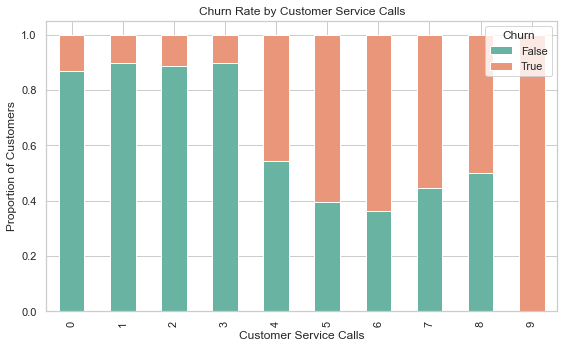

In [62]:
# Group data by number of customer service calls and churn
cs_calls_churn = df.groupby(['customer service calls', 'churn']).size().unstack()

# Normalize to get proportions
cs_calls_churn_percent = cs_calls_churn.div(cs_calls_churn.sum(axis=1), axis=0)

# Plot
cs_calls_churn_percent.plot(kind='bar', stacked=True, figsize=(8,5), color=['#69b3a2', '#e9967a'])
plt.title("Churn Rate by Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Proportion of Customers")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

## Interpretation: Churn Rate by Customer Service Calls

This stacked bar chart shows how the likelihood of a customer churning varies depending on the number of times they contacted customer service.

### Key Observations

- *Low Churn with Few Calls:*  
  Customers who made *0 to 3 customer service calls* have a *very low churn rate*. Most of them are retained (green portion), indicating satisfaction or fewer issues.

- *Churn Rises After 3 Calls:*  
  Starting from *4 calls and above*, the churn rate begins to increase significantly.  
  By *5 or more calls*, more customers are churning (orange portion becomes dominant).

- *High Churn Beyond 5 Calls:*  
  At *6 or more calls, the churn rate is very high — in some cases, **more than half* of the customers who contacted support this many times ended up churning.

### Interpretation

This trend strongly suggests a *relationship between customer dissatisfaction and churn*:
- Frequent contact with customer service likely signals unresolved problems or frustration.
- When issues aren't resolved promptly or effectively, customers are more likely to leave.

### Implication for the Business

- The company should *analyze customer service interactions closely*, especially for those who call multiple times.
- Taking *proactive steps* to resolve issues quickly for customers who call *more than 3 times* might significantly reduce churn.

## Churn vs Total Day Minutes

### Objective:
Determine if higher usage during the day (in terms of total minutes) has any relation to customer churn.

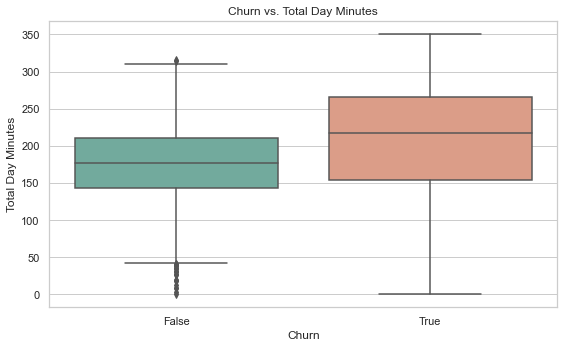

In [63]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total day minutes', data=df, palette=['#69b3a2', '#e9967a'])
plt.title('Churn vs. Total Day Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.tight_layout()
plt.show()

## Interpretation: Churn vs Total Day Minutes

This boxplot compares the distribution of total day minutes used by customers who churned versus those who did not.

###  Key Observations

- *Higher Usage Among Churned Customers*:
  - Customers who churned tend to have higher total day minutes compared to those who stayed.
  - The median (middle line in the box) for churned customers is visibly higher.

- *Wider Spread in Churned Group*:
  - The churned group shows more variability, with some customers using significantly more minutes than the average.

- *Potential Outliers*:
  - There are a few extreme outliers among the churned group, indicating very high usage for a small subset of customers.

###  Interpretation

This pattern suggests a correlation between *higher daytime usage* and *likelihood of churn*:

- Heavy users may have *higher expectations* or are more likely to experience *network or billing issues*, leading to dissatisfaction.
- Alternatively, the pricing model might not favor high-usage customers, prompting them to switch providers.

###  Implication for the Business

- Analyze the experience of high-usage customers — Are they facing service degradation? Are they unhappy with pricing?
- Consider *loyalty programs or better plans* for heavy users to prevent them from churning.
- Use this insight to *segment customers by usage* and apply *targeted retention strategies*.

### Churn vs Customer Service Calls (Categorical)

###  Objective

Investigate the relationship between the number of customer service calls and churn, with a focus on understanding if increased customer service interactions correlate with higher churn rates.

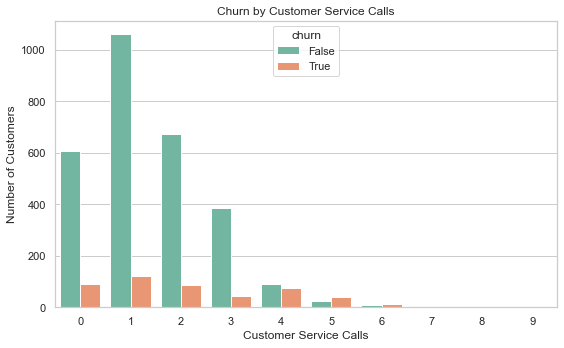

In [64]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='customer service calls', hue='churn', data=df, palette='Set2')
plt.title('Churn by Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### Interpretation: Churn vs Customer Service Calls (Categorical)

This count plot visualizes the number of customer service calls made by customers and how it relates to churn.

####  Key Observations

- *Higher Churn with More Calls*:  
  Customers who made 4 or more customer service calls are significantly more likely to churn.

- *Majority Didn't Call Much*:  
  Most customers, both churned and non-churned, made fewer than 3 calls.

- *Churn Rate Spikes After 3 Calls*:  
  The churn rate sharply increases for customers who contacted customer service frequently.

## Statistics

### Objective

To perform statistical analysis on the dataset to determine whether the differences observed in earlier visualizations (e.g., churn vs. total minutes, service plans, etc.) are statistically significant. This helps to validate whether patterns are likely due to chance or represent meaningful relationships.

## Descriptive Statistics by Churn

###  Objective

To summarize and compare key statistics (mean, median, standard deviation, etc.) between customers who churned and those who didn’t, across relevant features. This provides a clearer picture of behavioral or usage differences.

In [65]:
# Group by churn and calculate descriptive statistics
churn_stats = df.groupby('churn').describe()

# Display summary
churn_stats.T  # Transpose for better readability

churn                               False       True 
account length         count  2850.000000  483.000000
                       mean    100.793684  102.664596
                       std      39.882350   39.467820
                       min       1.000000    1.000000
                       25%      73.000000   76.000000
...                                   ...         ...
customer service calls min       0.000000    0.000000
                       25%       1.000000    1.000000
                       50%       1.000000    2.000000
                       75%       2.000000    4.000000
                       max       8.000000    9.000000

[128 rows x 2 columns]

### Interpretation: Descriptive Statistics by Churn

This analysis provides summary statistics for numerical features, grouped by customer churn status.

#### Key Observations:

- *Account Length:*
  - Mean account length is slightly higher for churned customers (102.7) compared to non-churned (100.8).
  - Standard deviations are similar, indicating comparable spread.
  - Not a strong differentiator on its own.

- *Customer Service Calls:*
  - Median (50%) number of calls for churned customers is *2, compared to **1* for non-churned.
  - The upper quartile (75%) is *4* for churned vs. *2* for non-churned, and the maximum is slightly higher (9 vs. 8).
  - Indicates that churned customers tend to contact customer service more often.

#### Implication:

- Features like *customer service calls* show clearer distinctions between churned and non-churned groups and may serve as a useful predictor in churn modeling.
- Other variables like account length show only minor differences and might have less predictive power individually.

This analysis provides summary statistics for numerical features, grouped by customer churn status.

## Independent T-Test: Total Night Minutes

*Objective:*  
To test whether the average total night minutes differ significantly between churned and non-churned customers using an *Independent Samples T-Test*.

This statistical test helps determine whether the observed difference in means (if any) is statistically significant or likely due to random chance.

---

*Hypotheses:*

- *Null Hypothesis (H₀):*  
  There is *no significant difference* in total night minutes between churned and non-churned customers.

- *Alternative Hypothesis (H₁):*  
  There *is a significant difference* in total night minutes between churned and non-churned customers.

---

*Assumptions for T-Test:*

- Data in each group is approximately *normally distributed*.
- Variances between groups are *roughly equal* (or Welch's t-test is used otherwise).
- Observations are *independent*.

In [66]:
from scipy.stats import ttest_ind

# Separate groups
churned = df[df['churn'] == True]['total night minutes']
not_churned = df[df['churn'] == False]['total night minutes']

# Perform Independent T-Test
t_stat, p_value = ttest_ind(churned, not_churned, equal_var=False)  # Welch's t-test

# Output results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation guidance
if p_value < 0.05:
    print(" There is a statistically significant difference in total night minutes between churned and non-churned customers.")
else:
    print(" No statistically significant difference found.")

T-statistic: 2.1708889020090862
P-value: 0.030280490212476915
 There is a statistically significant difference in total night minutes between churned and non-churned customers.


##  Independent T-Test: Total Night Minutes

### Objective:
To test whether the average total night minutes differ significantly between churned and non-churned customers using an Independent Samples T-Test.

---

###  Hypotheses:

- *Null Hypothesis (H₀):*  
  There is no significant difference in total night minutes between churned and non-churned customers.

- *Alternative Hypothesis (H₁):*  
  There is a significant difference in total night minutes between churned and non-churned customers.

---

###  Assumptions for the T-Test:
- Observations are independent.
- Data in each group is approximately normally distributed.
- Variances between groups are not assumed equal (Welch’s t-test used).

---

###  Results:

- *T-statistic:* 2.17  
- *P-value:* 0.0303

---

###  Interpretation:

Since the *p-value (0.0303)* is *less than 0.05, we **reject the null hypothesis*.  
 This means there is a *statistically significant difference* in average total night minutes between customers who churned and those who did not.

This insight can be valuable for churn prediction modeling, suggesting that night usage behavior differs between the two groups.

## Independent T-Test: Customer Service Calls

 *Objective*  
To assess whether the average number of customer service calls differs significantly between customers who churned and those who did not using an Independent Samples T-Test.

This test helps determine if frequent customer service contact is statistically associated with higher churn likelihood.

---

###  Hypotheses

- *Null Hypothesis (H₀):*  
  There is no significant difference in the number of customer service calls between churned and non-churned customers.

- *Alternative Hypothesis (H₁):*  
  There is a significant difference in the number of customer service calls between churned and non-churned customers.

In [68]:
from scipy.stats import ttest_ind

# Separate the data into two groups
churned_calls = df[df['churn'] == True]['customer service calls']
not_churned_calls = df[df['churn'] == False]['customer service calls']

# Perform the independent t-test
t_stat_calls, p_val_calls = ttest_ind(churned_calls, not_churned_calls, equal_var=False)

# Print the results
print("T-statistic:", t_stat_calls)
print("P-value:", p_val_calls)

T-statistic: 8.95514138244338
P-value: 5.270040385717215e-18


### T-Test Results: Customer Service Calls

*T-statistic:* 8.96  
*P-value:* 5.27 × 10⁻¹⁸

####  Interpretation:

- The *very high T-statistic* and *extremely low p-value* (far below the 0.05 threshold) indicate a *highly statistically significant difference* in the number of customer service calls between customers who churned and those who did not.
- This strongly suggests that *churned customers tend to make more customer service calls* than non-churned customers.

####  Implication:
Customer service call frequency is a *key predictive feature* for churn. High volumes of service calls may signal dissatisfaction, making it a valuable input for churn prediction models.

## Correlation Matrix

 *Objective*  
To examine the strength and direction of relationships between numerical variables in the dataset, including how they correlate with churn.

Understanding correlations helps identify:
- Redundant variables
- Key influencers on churn
- Potential multicollinearity issues before model building

 *Approach*
- Calculate the Pearson correlation coefficient between all numerical features.
- Visualize the results using a heatmap for easy interpretation.
- Pay special attention to variables with strong positive or negative correlation with churn.

 *Note*  
Correlation does not imply causation. High correlation between a feature and churn doesn’t guarantee it's the cause but indicates a potential predictive relationship.

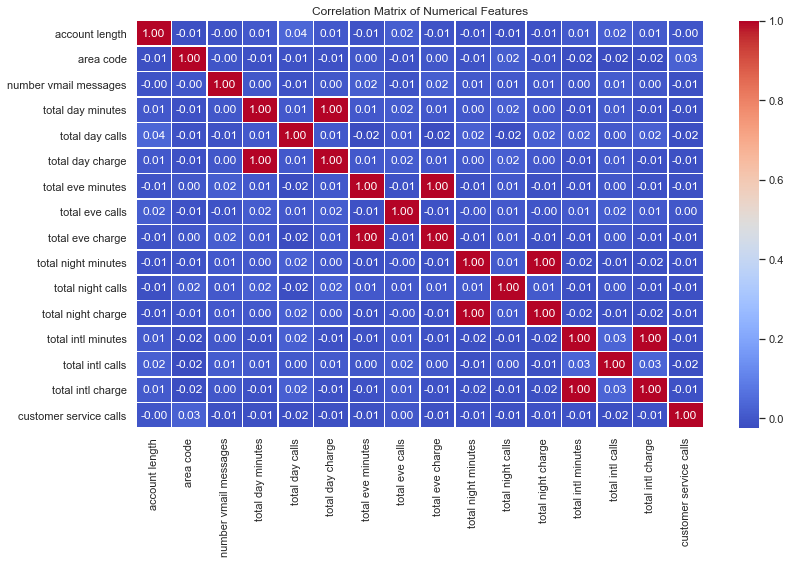

In [69]:
# Note: Correlation does not imply causation.
# High correlation indicates a predictive relationship, not causality.

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

##  Correlation Matrix Interpretation

This heatmap visualizes the correlation between numerical features in the dataset. Correlation values range from *-1 to 1*:

- *+1* → Perfect positive correlation (as one variable increases, the other increases)
- *-1* → Perfect negative correlation (as one increases, the other decreases)
- *0* → No linear relationship

---

###  Key Observations

####  Strong Positive Correlations (≈ 1.00)

| Feature Pair                           | Correlation | Interpretation |
|----------------------------------------|-------------|----------------|
| total day minutes & total day charge     | *1.00*      | Charges are directly based on usage. |
| total eve minutes & total eve charge     | *1.00*      | Linear billing relationship. |
| total night minutes & total night charge | *1.00*      | Charges are proportional to minutes. |
| total intl minutes & total intl charge   | *1.00*      | Charges stem directly from international usage. |

> These perfect correlations are expected due to the way charges are calculated.

---

####  Low or No Correlation (≈ 0)

Most other features have weak or no linear relationships:

- customer service calls with all other features
- number vmail messages with usage or billing features
- account length with usage patterns or charges

> These features contribute independent signals to the dataset.

---

####  Weak Negative Correlations (≈ -0.01)

- area code shows weak negative correlation with some variables.
- No significant inverse relationships observed.

---

###  Recommendations for Modeling

- *Remove redundant features* (e.g., drop charges or minutes where correlation = 1.0) to avoid multicollinearity in models like *linear regression*.
- *Retain independent features* such as:
  - customer service calls
  - number vmail messages
  - total intl calls

These may offer valuable signals for prediction tasks.

### One-Way ANOVA — Total Day Minutes by Area Code

###  Objective:
To determine if there's a statistically significant difference in *total day minutes* across different *area codes*.

---

###  Hypotheses:

- *Null Hypothesis (H₀):*  
  There is *no significant difference* in total day minutes across area codes.

- *Alternative Hypothesis (H₁):*  
  At least *one area code group* has a *significantly different mean* of total day minutes.


###  Assumptions:

1. *Independence:*  
   Samples are independent of each other.

2. *Normality:*  
   The data in each group is approximately *normally distributed*.

3. *Homogeneity of Variance:*  
   Variance is *roughly equal across all groups* (homoscedasticity).

In [71]:
from scipy.stats import f_oneway

# Separate groups based on area code
group_408 = df[df['area code'] == 408]['total day minutes']
group_415 = df[df['area code'] == 415]['total day minutes']
group_510 = df[df['area code'] == 510]['total day minutes']

# Run one-way ANOVA
f_stat, p_value = f_oneway(group_408, group_415, group_510)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 2.0152078300949974
P-value: 0.1334552217622214


##  Interpretation:
Since the p-value (0.1335) > 0.05, we fail to reject the null hypothesis.

This means that there is no statistically significant difference in the mean total day minutes among area codes 408, 415, and 510.

## Conclusion:
Area code does not significantly affect the total day minutes. Users from different area codes spend a similar amount of time on calls during the day.

### Machine Learning Models
### Prepare Data for Modeling

Before training models, we need to:

- Separate features (X) and target (y)

- Split into train and test sets

- Optionally standardize or normalize features for certain models like KNN and Logistic Regression

In [72]:
# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve


## Data Splitting and Feature Scaling

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Split the data (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Column transformer to handle both types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Apply transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)



### Logistic Regression with Pipeline, Evaluation & Interpretation
We’ll use a pipeline that combines preprocessing and model training, and evaluate the model with:

- Classification report

- Confusion matrix

- ROC curve
- Heatmap visualization



### Logistic Regression Model

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Create pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predict
y_pred = logreg_pipeline.predict(X_test)
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]  # probabilities for ROC


In [77]:
print("Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred))


Classification Report (Logistic Regression):

              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667



### Confusion Matrix + Heatmap

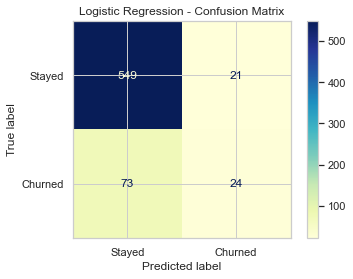

In [80]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stayed", "Churned"])
disp.plot(cmap="YlGnBu")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


### ROC Curve

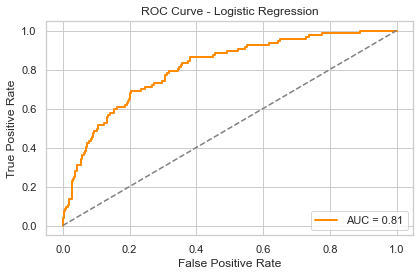

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


### Interpretation
Precision & Recall: From the classification report, analyze how well the model performs for churned customers.

Confusion Matrix: Helps you see false positives vs true negatives.

ROC AUC: AUC closer to 1 = better model. If < 0.7, performance is modest.

### Random Forest Classifier with Pipeline, Evaluation & Interpretation
Random Forest is a robust ensemble method that helps reduce overfitting and captures nonlinear patterns.

## Random Forest Model & Pipeline

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Create pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]


In [87]:
# Classification Report

print("Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

Classification Report (Random Forest):

              precision    recall  f1-score   support

       False       0.90      0.99      0.95       570
        True       0.93      0.38      0.54        97

    accuracy                           0.91       667
   macro avg       0.91      0.69      0.74       667
weighted avg       0.91      0.91      0.89       667



### Confusion Matrix + Heatmap

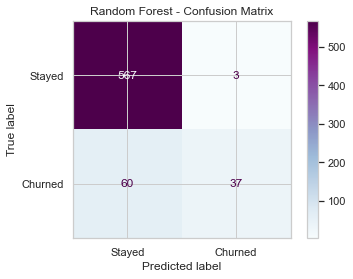

In [89]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Churned"])
disp_rf.plot(cmap="BuPu")
plt.title("Random Forest - Confusion Matrix")
plt.show()


### ROC Curve

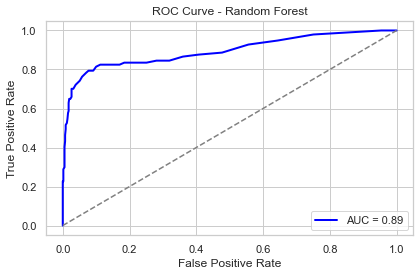

In [91]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='AUC = %0.2f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


### Interpretation
Better at capturing complex feature interactions.

Check recall: Did it improve for the churn class?

AUC Score: Compare to Logistic Regression—higher = better discriminatory power.

### XGBoost Classifier with Pipeline, Evaluation & Interpretation
XGBoost is a powerful gradient boosting algorithm known for its speed and performance on structured data.

### XGBoost Model & Pipeline

In [94]:
from xgboost import XGBClassifier

# Create pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]


[21:38:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [95]:
print("Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb))


Classification Report (XGBoost):

              precision    recall  f1-score   support

       False       0.95      0.98      0.97       570
        True       0.88      0.71      0.79        97

    accuracy                           0.94       667
   macro avg       0.92      0.85      0.88       667
weighted avg       0.94      0.94      0.94       667



### Confusion Matrix + Heatmap


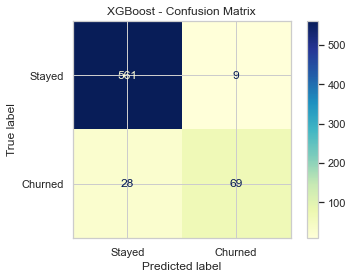

In [97]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["Stayed", "Churned"])
disp_xgb.plot(cmap="YlGnBu")
plt.title("XGBoost - Confusion Matrix")
plt.show()


### ROC Curve

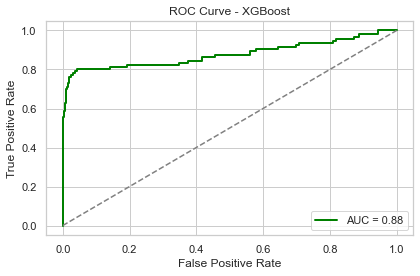

In [98]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='AUC = %0.2f' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


### Interpretation
XGBoost often yields the best balance of precision and recall.

Especially good for handling unbalanced data and missing values.

Evaluate if it improves over Random Forest and Logistic Regression in AUC, F1-score, or Recall for churn.

### Gradient Boosting Classifier (GBM) with Pipeline, Evaluation & Interpretation
- Gradient Boosting builds trees sequentially, correcting errors from the previous tree. 
- It’s often very accurate but slower to train than XGBoost.

### Gradient Boosting Model & Pipeline

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

# Create pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Predict
y_pred_gb = gb_pipeline.predict(X_test)
y_proba_gb = gb_pipeline.predict_proba(X_test)[:, 1]


### Classification Report

In [100]:
print("Classification Report (Gradient Boosting):\n")
print(classification_report(y_test, y_pred_gb))


Classification Report (Gradient Boosting):

              precision    recall  f1-score   support

       False       0.94      0.99      0.96       570
        True       0.88      0.60      0.71        97

    accuracy                           0.93       667
   macro avg       0.91      0.79      0.84       667
weighted avg       0.93      0.93      0.92       667



### Confusion Matrix + Heatmap